### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
shipping_data = pd.read_csv('/content/Ecom_Shipping_stride.csv')
shipping_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


`The data contains the following information:

* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time. 
`

In [3]:
shipping_data.shape

(10999, 12)

In [4]:
shipping_data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
shipping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
shipping_data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
# Print some information about the data
print("Missing values:", shipping_data.isna().sum().sum())
print('--------------------------------------------------------------------------')
print("Categorical features:", len(shipping_data.select_dtypes('object').columns))
print('--------------------------------------------------------------------------')
print("Categorical features:",(shipping_data.select_dtypes('object').columns))
print('--------------------------------------------------------------------------')
print("Numerical features:", len(shipping_data.select_dtypes('number').columns))
print('--------------------------------------------------------------------------')
print("Numerical features:",(shipping_data.select_dtypes('number').columns))

Missing values: 0
--------------------------------------------------------------------------
Categorical features: 4
--------------------------------------------------------------------------
Categorical features: Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')
--------------------------------------------------------------------------
Numerical features: 8
--------------------------------------------------------------------------
Numerical features: Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


## Removing ID Column

In [8]:
shipping_data.drop(columns=['ID'], inplace=True)


In [9]:
shipping_data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


### Issues List For the Dataset
Rename columns to be more workable
Other than this, the dataset is very clean

In [10]:
# Renaming columns

shipping_data.rename(columns={'Warehouse_block': 'block',
                   'Mode_of_Shipment': 'ship_method',
                   'Customer_care_calls': 'num_calls',
                   'Customer_rating': 'rating',
                   'Cost_of_the_Product': 'cost',
                   'Prior_purchases': 'num_prev_orders',
                   'Product_importance': 'priority',
                   'Gender': 'gender',
                   'Discount_offered': 'discount',
                   'Weight_in_gms': 'weight',
                   'Reached.on.Time_Y.N': 'on_time'},
          inplace=True)

In [11]:
shipping_data.head()

,block,ship_method,num_calls,rating,cost,num_prev_orders,priority,gender,discount,weight,on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [12]:
print(f'Number of Unique Values in Each Column:\n{shipping_data.nunique()}')


Number of Unique Values in Each Column:
block                 5
ship_method           3
num_calls             6
rating                5
cost                215
num_prev_orders       8
priority              3
gender                2
discount             65
weight             4034
on_time               2
dtype: int64


### finding out what the different values of some columns are

In [13]:
blocks = shipping_data.block.unique()
print(blocks)

['D' 'F' 'A' 'B' 'C']


In [14]:
block_counts = shipping_data.block.value_counts()
print(block_counts)

F    3666
D    1834
A    1833
B    1833
C    1833
Name: block, dtype: int64


In [15]:
df_block = block_counts.reset_index()


<Axes: xlabel='Block', ylabel='count'>

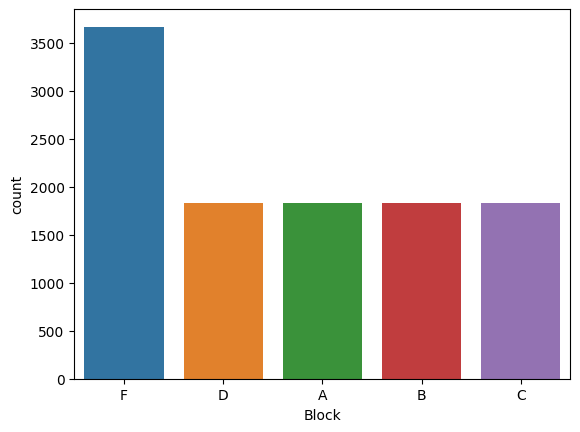

In [16]:
# Rename the columns
df_block.columns = ['Block', 'count']

# Plot a barplot using Seaborn
sns.barplot(x='Block', y='count', data=df_block)

In [17]:
method = shipping_data.ship_method.unique()
print(method)

['Flight' 'Ship' 'Road']


In [18]:
method_count = shipping_data.ship_method.value_counts()
print(method_count)

Ship      7462
Flight    1777
Road      1760
Name: ship_method, dtype: int64


<Axes: xlabel='Shipping Method', ylabel='count'>

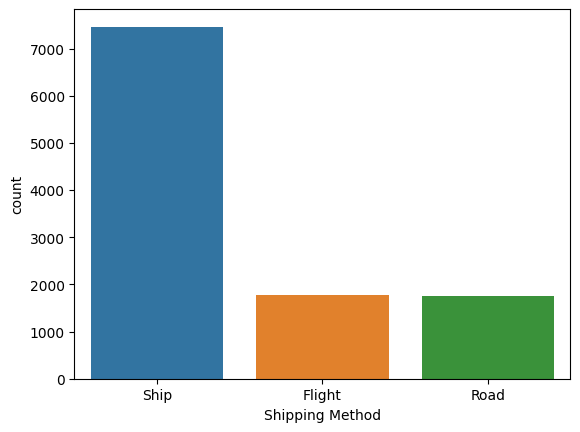

In [19]:
df_method = method_count.reset_index()

# Rename the columns
df_method.columns = ['Shipping Method', 'count']

# Plot a barplot using Seaborn
sns.barplot(x='Shipping Method', y='count', data=df_method)

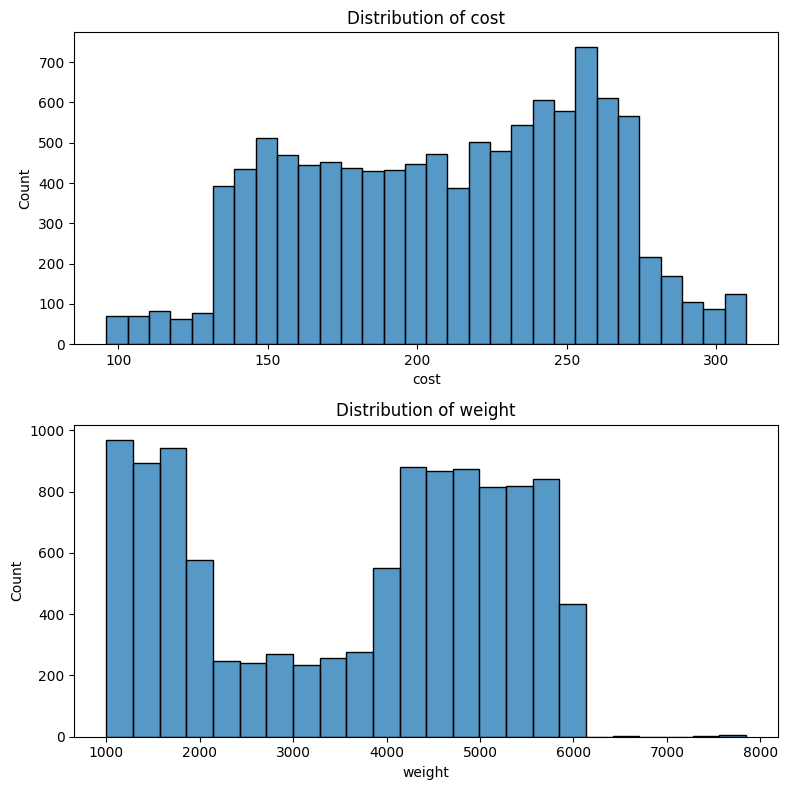

In [20]:
cont_cols = ['cost', 'weight']

plt.figure(figsize = (8, 8))
plotnumber = 1


for i in range(len(cont_cols)):
        ax = plt.subplot(2, 1, plotnumber)
        sns.histplot(x = cont_cols[i], data = shipping_data, ax = ax)
        plt.title(f'Distribution of {cont_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()


### Correlation of Numerical Features

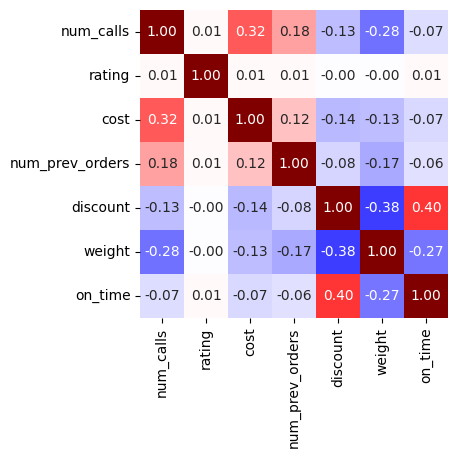

In [21]:
# Display the correlation heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(shipping_data[shipping_data.select_dtypes('number').columns].corr(),
            square=True, cmap='seismic', cbar=False, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

The Cutomer Rating does not seem correlated at all with other features.



### Feature Vizualisation
Let's visualize the feature repartition.

### Categorical

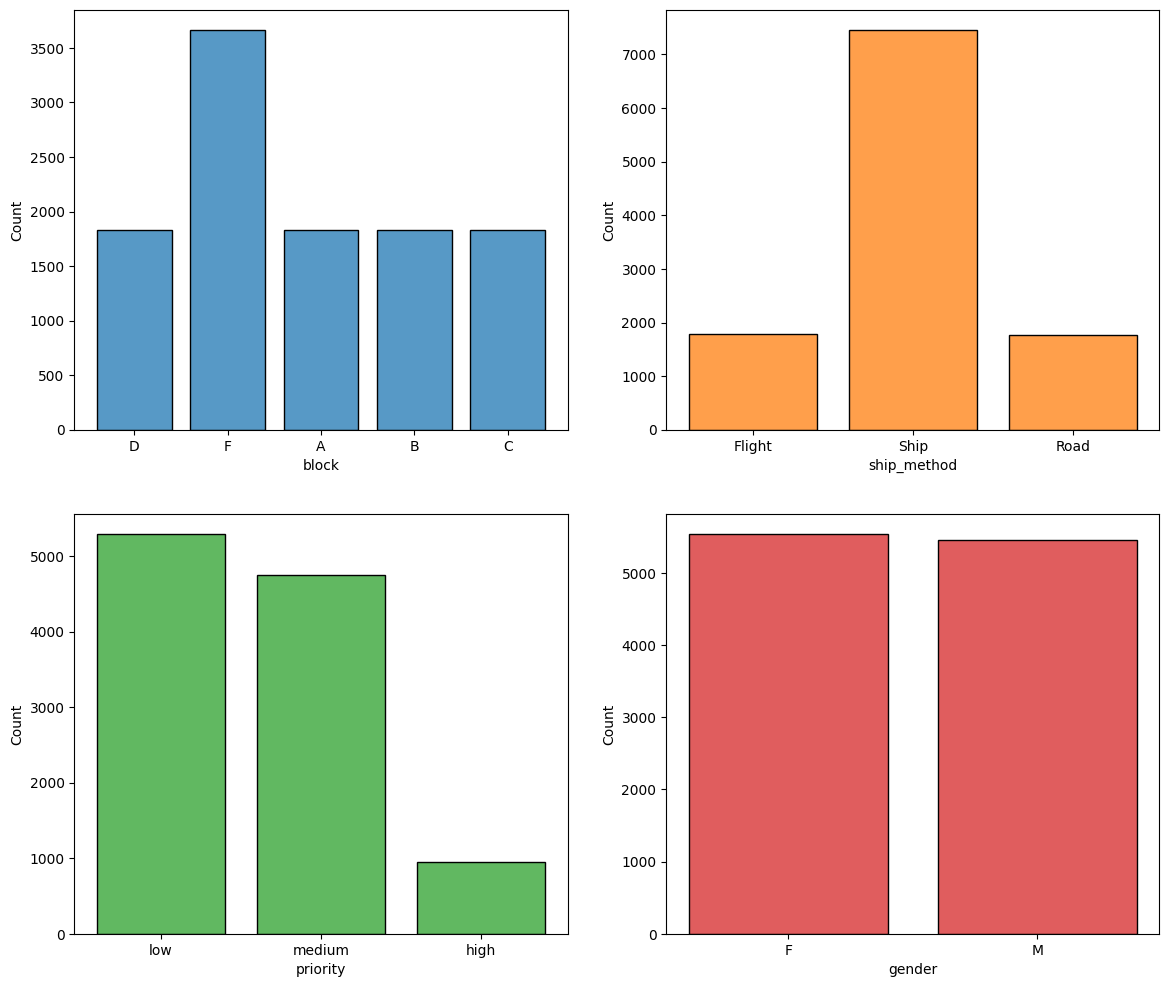

In [22]:
# Display class repartitions
plt.figure(figsize=(14, 12))

cat_features = shipping_data.select_dtypes('object').columns.values

for i, cat in enumerate(cat_features):

    plt.subplot(2, 2, i+1)
    sns.histplot(shipping_data[cat], shrink=0.8, color=pal[i])
    
plt.show()

* Warehouse: Blocks A, B, C, D are equilibrated while block F is predominent (1/2 ratio).
* Shipment: Flight and Road have similar observations while Ship is predominent (1/4 ratio).
* Importance: There is a majority of low and medium importances and a minority of high importances.
* Genders: Both classes are balanced.

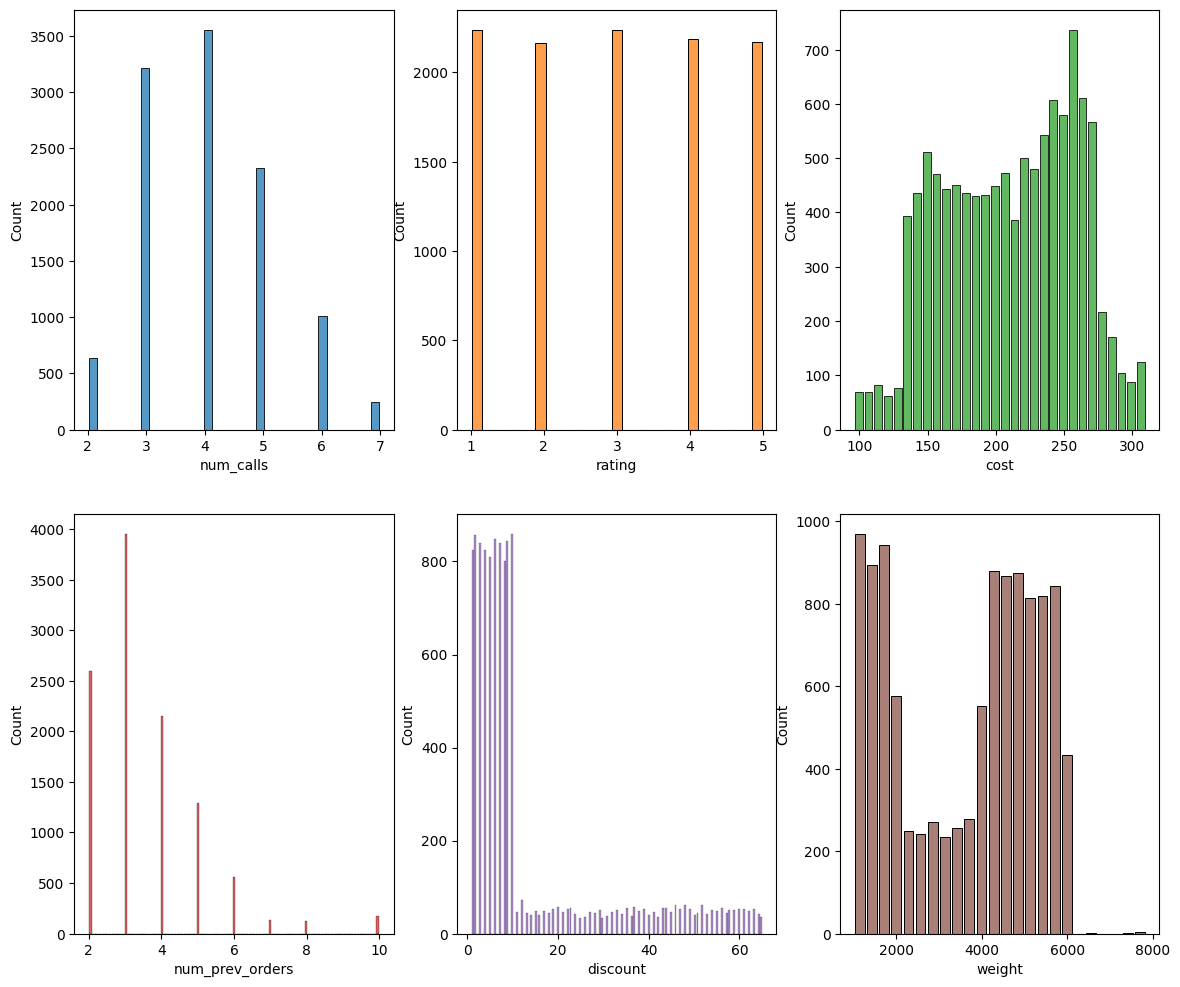

In [23]:
# Display Numeric repartitions
plt.figure(figsize=(14, 12))

num_features = shipping_data.select_dtypes('number').drop('on_time', axis=1).columns.values
for i, num in enumerate(num_features):

    plt.subplot(2,3, i+1)
    sns.histplot(shipping_data[num], shrink=0.8, color=pal[i])
    
plt.show()

* Care Calls: Sligh positive skewed normal distribution with mode at 4.
* Customer Rating: Uniform distribution.
* Costs: 2 picks: smallest around 150, highest around 250.
* Prior Purchases: Positive skewed normal distribution, mode at 3.
* Discount offered: Separated into 2 uniform distributions: 0 to 10 is predominent and then small amount from 10 to 65.
* Weight: 3 zones: high from 1000 to 2000 and from 4000 to 6000. Low from 2000 to 4000.

###  percentage of shipments that are delivered on time


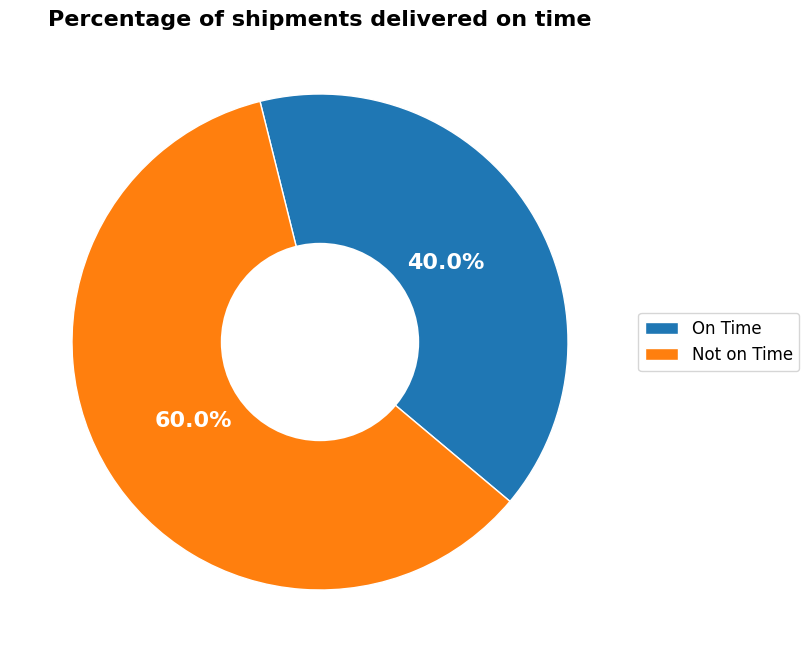

In [24]:
# Calculate the percentage of shipments that are not delivered on time
not_on_time_percentage = shipping_data['on_time'].mean() * 100

# Calculate the percentage of shipments that are delivered on time
on_time_percentage = 100 - not_on_time_percentage

# Round up the percentages to the nearest integer
not_on_time_percentage = np.ceil(not_on_time_percentage)
on_time_percentage = np.floor(on_time_percentage)

# Define the colors for the chart
colors = ['#1f77b4', '#ff7f0e']

# Calculate the percentage of shipments that are delivered on time
on_time_percentage = 100 - not_on_time_percentage
# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size
ax.axis('equal')
wedges, texts, autotexts = ax.pie([on_time_percentage, not_on_time_percentage],
                                  wedgeprops=dict(width=0.9, edgecolor='w'),
                                  startangle=-40, colors=colors, autopct='%1.1f%%')
plt.setp(autotexts, size=16, weight='bold', color='white')
plt.setp(texts, size=12, weight='bold')
ax.set_title('Percentage of shipments delivered on time', fontsize=16, weight='bold')

# Draw a white circle in the center of the chart to create a hole
center_circle = plt.Circle((0,0),0.4,color='white', fc='white',linewidth=0)
fig.gca().add_artist(center_circle)

# Add a legend to the chart outside of the plot
ax.legend(wedges, ['On Time', 'Not on Time'], loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.show()


# 60% of all shipments are not delivered on time


In [25]:
cols = shipping_data.columns.drop(['cost', 'discount', 'weight', 'on_time'])

# columns to split into bins
cols2 = ['cost', 'discount', 'weight']


target_col = shipping_data.columns[-1]
target_col

'on_time'

In [26]:
# preparing dataframes/visuals to go through

dfs = []

for col in cols:
    df = shipping_data.groupby(col)[target_col].agg(['mean', 'count'])
    df['%_of_total'] = df['count'] / len(shipping_data)
    df.rename(columns={'mean': '%_of_shipments_delayed', 'count': 'value_count'}, inplace=True)
    df = df.style.bar(subset=['%_of_shipments_delayed'], color='#ECC4C4').bar(subset=['value_count'], color='#B1DFB4').bar(subset=['%_of_total'], color='#B1DFE8').format(formatter={'%_of_shipments_delayed': '{:,.1%}', '%_of_total': '{:,.1%}'})
    dfs.append(df)

len(dfs)


7

In [27]:
for i in cols2:

    bins = pd.cut(shipping_data[i], 10)

    df = pd.DataFrame(shipping_data.groupby(bins)[target_col].mean())
    df['value_count'] = shipping_data.groupby(bins)[target_col].count()
    df['value_count_%_of_total'] = (shipping_data.groupby(bins)[target_col].count()/len(shipping_data))
    
    df.rename(columns={'Reached.on.Time_Y.N' : '%_of_shipments_delayed'}, inplace=True)
    
    df = (df.style
        .bar(subset=[df.columns[0]], color='#ECC4C4')
        .bar(subset=['value_count'], color='#B1DFB4')
        .bar(subset=['value_count_%_Total Percentage'], color='#B1DFE8')
        .format(formatter={(df.columns[0]): '{:,.1%}',
                           ('value_count_%_of_total'): '{:,.1%}'
                              }))

    dfs.append(df)

len(dfs)

10

In [28]:
dfs[0]

# Warehouse 'F' accounts to 33% of all delivery volume

,%_of_shipments_delayed,value_count,%_of_total
block,,,
A,58.6%,1833,16.7%
B,60.2%,1833,16.7%
C,59.7%,1833,16.7%
D,59.8%,1834,16.7%
F,59.8%,3666,33.3%


In [29]:
dfs[1]

,%_of_shipments_delayed,value_count,%_of_total
ship_method,,,
Flight,60.2%,1777,16.2%
Road,58.8%,1760,16.0%
Ship,59.8%,7462,67.8%


### The chart shows the percentage of shipments that were delayed for three different shipping methods: Flight, Road, and Ship.
1. Of the three methods, shipments that were transported by Flight had the highest percentage of delays, at 60.2%. Road shipments had a slightly lower percentage of delays at 58.8%, and Ship shipments had a delay rate of 59.8%.
2. In terms of the number of shipments, the Ship method was by far the most commonly used, accounting for 67.8% of all shipments. This method had a delay rate of 59.8%.
3. The Road method accounted for 16.0% of all shipments and had a delay rate of 58.8%. The Flight method was used for the smallest proportion of shipments, at 16.2%, but had the highest delay rate at 60.2%.
4. Based on these numbers, it may be worth exploring ways to reduce delays for all three shipping methods, but particularly for Flight shipments. However, it's also important to consider the overall volume of shipments and the cost-effectiveness of each method.

In [30]:
dfs[2]

,%_of_shipments_delayed,value_count,%_of_total
num_calls,,,
2,65.2%,638,5.8%
3,62.5%,3217,29.2%
4,59.8%,3557,32.3%
5,58.4%,2328,21.2%
6,51.6%,1013,9.2%
7,51.6%,246,2.2%


1. approx 80% of customers make 3-5 calls
2. customers who call more frequently, have their shipments delivered in time more often

In [31]:
dfs[3]

,%_of_shipments_delayed,value_count,%_of_total
rating,,,
1,58.7%,2235,20.3%
2,58.8%,2165,19.7%
3,60.6%,2239,20.4%
4,59.5%,2189,19.9%
5,60.7%,2171,19.7%


1. The percentage of delayed shipments is fairly consistent across all rating categories, ranging from 58.7% to 60.7%. This suggests that shipment delays are not necessarily related to the customer's rating of the service.
2.  The chart shows that the number of shipments in each rating category is roughly equal, with each category representing around 19-20% of the total number of shipments. This indicates that the company's customers are fairly evenly distributed across the different rating categories.

In [32]:
dfs[4]

,%_of_shipments_delayed,value_count,%_of_total
num_prev_orders,,,
2,62.5%,2599,23.6%
3,64.1%,3955,36.0%
4,54.3%,2155,19.6%
5,49.9%,1287,11.7%
6,56.0%,561,5.1%
7,67.6%,136,1.2%
8,64.8%,128,1.2%
10,57.3%,178,1.6%


This chart shows how the percentage of delayed shipments is related to the number of previous orders a customer has made. The percentage of delayed shipments generally increases as the number of previous orders increases. Customers with 3 previous orders have the highest percentage of delayed shipments (64.1%). Customers with 2 and 4 previous orders also have relatively high percentages of delayed shipments. The sample size decreases as the number of previous orders increases, which could affect the accuracy of the percentages.

In [33]:
dfs[5]

,%_of_shipments_delayed,value_count,%_of_total
priority,,,
high,65.0%,948,8.6%
low,59.3%,5297,48.2%
medium,59.0%,4754,43.2%


### Percentage of delayed shipments and the number of shipments for each priority level: high, medium, and low.

1. As you can see, shipments with high priority have the highest percentage of delays at 65%, followed by shipments with medium and low priority at 59% each.

2. In terms of the number of shipments, low priority shipments make up the largest proportion with 48% of the total, followed by medium priority shipments at 43%, and high priority shipments with the smallest proportion at 8.6%.

In [34]:
dfs[6]

,%_of_shipments_delayed,value_count,%_of_total
gender,,,
F,59.4%,5545,50.4%
M,59.9%,5454,49.6%


 The data indicates that both genders experience delays in their shipments at similar rates, with around 60% of shipments being delayed. The number of shipments is roughly equal between genders, with females accounting for slightly more than half (50.4%) of the total shipments.

# Data Preprocessing

In [35]:
shipping_data.head()

,block,ship_method,num_calls,rating,cost,num_prev_orders,priority,gender,discount,weight,on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [37]:
data = shipping_data.drop(['gender',], axis='columns')


In [38]:
data.head()

,block,ship_method,num_calls,rating,cost,num_prev_orders,priority,discount,weight,on_time
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1


In [39]:
# Step 3: Encode any categorical variables into numerical values
label_encoder = LabelEncoder()
data["block"] = label_encoder.fit_transform(data["block"])
data["ship_method"] = label_encoder.fit_transform(data["ship_method"])
data["priority"] = label_encoder.fit_transform(data["priority"])


In [40]:
data.head()

,block,ship_method,num_calls,rating,cost,num_prev_orders,priority,discount,weight,on_time
0,3,0,4,2,177,3,1,44,1233,1
1,4,0,4,5,216,2,1,59,3088,1
2,0,0,2,2,183,4,1,48,3374,1
3,1,0,3,3,176,4,2,10,1177,1
4,2,0,2,2,184,3,2,46,2484,1


In [41]:
# Step 4: Split the data into training and testing sets
X = data.drop("on_time", axis=1)
y = data["on_time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:

# Step 5: Scale the data to ensure all independent variables are on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Modeling

### Using Simple logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,classification_report

In [44]:
lr = LogisticRegression(random_state=42)


In [45]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [46]:
# Evaluate your model's performance
y_pred = lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Print the results
print('Confusion matrix:\n', conf_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:',acc)


Confusion matrix:
 [[490 405]
 [400 905]]
Precision: 0.6908396946564885
Recall: 0.6934865900383141
F1-score: 0.6921606118546845
Accuracy: 0.634090909090909


In [47]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [48]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [49]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [50]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.6507577050367153


In [51]:
# Evaluate your model's performance

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Best hyperparameters:', clf.best_params_)
print("Best Score:", clf.best_score_)
print('Accuracy:',acc)

Precision: 0.7126984126984127
Recall: 0.6881226053639847
F1-score: 0.7001949317738791
Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.6507577050367153
Accuracy: 0.6504545454545455


## Using Classification Algorithm

### 1. Decision Tree 

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
dt = DecisionTreeClassifier()
params=[{'criterion':['gini','entropy'],
             'max_depth':range(2,5),
             'min_samples_leaf':range(2,7),
             }]

grd = GridSearchCV(estimator=dt,param_grid=params,cv=3)

grd_model = grd.fit(X_train,y_train)

grd_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}

In [53]:
dt = DecisionTreeClassifier(criterion=grd_model.best_params_.get('criterion'),
                           max_depth=grd_model.best_params_.get('max_depth'),
                           min_samples_leaf=grd_model.best_params_.get('max_depth'))

dt_model = dt.fit(X_train,y_train)

ytrain_pred = dt_model.predict(X_train)
ytest_pred = dt_model.predict(X_test)
print("The accuracy score of regularized Decision tree is: ",accuracy_score(y_train,ytrain_pred))
print("The accuracy score of regularized Decision tree is: ",accuracy_score(y_test,ytest_pred))

The accuracy score of regularized Decision tree is:  0.6847369019206728
The accuracy score of regularized Decision tree is:  0.6845454545454546


### 2. Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params=[{'n_estimators':[100,150,200],
       'criterion':['gini','entropy'],
             'max_depth':range(2,5),
             'min_samples_leaf':range(2,7),
             }]

grd = GridSearchCV(estimator=rf,param_grid=params,cv=3)

grd_model = grd.fit(X_train,y_train)

grd_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'n_estimators': 200}

In [55]:
rf = RandomForestClassifier(criterion=grd_model.best_params_.get('criterion'),
                           max_depth=grd_model.best_params_.get('max_depth'),
                           min_samples_leaf=grd_model.best_params_.get('max_depth'),
                           n_estimators=grd_model.best_params_.get('n_estimators'))

rf_model = dt.fit(X_train,y_train)

ytrain_pred = rf_model.predict(X_train)
ytest_pred = rf_model.predict(X_test)

In [56]:
print("The accuracy score of regularized Random Forest is: ",accuracy_score(y_train,ytrain_pred))
print("The accuracy score of regularized Random Forest is: ",accuracy_score(y_test,ytest_pred))

The accuracy score of regularized Random Forest is:  0.6847369019206728
The accuracy score of regularized Random Forest is:  0.6845454545454546


# Generic Algorithm Comparision

In [57]:
# Created generic metrics comparer for all algorithm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm

lr = LogisticRegression(random_state= 43, solver='lbfgs', max_iter=1000)
rf = RandomForestClassifier(random_state=43)
svm = svm.SVC(gamma='auto',C=5,kernel='rbf')

models = [lr,rf,svm] # models = [rf,ad, dt, kn, svc, mlp, lr, gnb]
for model in models:
    model.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    scores = cross_val_score(model, X, y, cv=5).mean().round(3)
    accuracy = metrics.accuracy_score(y_test, y_pred).round(3)
    ROC = metrics.roc_auc_score(y_test, y_pred).round(3)
    f1score = metrics.f1_score(y_test, y_pred).round(3)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred).round(3)
    precision = metrics.precision_score(y_test, y_pred).round(3)
    recall = metrics.recall_score(y_test, y_pred).round(3)

# Print the results
    print(model, '\n', 'Accuracy:', accuracy,'\n', 'mean_CV_score:',scores, '\n' , 'ROC:', ROC,'\n', 'F1 Score:', f1score,'\n',
         'Confusion matrix:\n', conf_matrix,'\n', 'Precision:',precision,'\n', 'Recall:',recall, '\n', '\n')

LogisticRegression(max_iter=1000, random_state=43) 
 Accuracy: 0.634 
 mean_CV_score: 0.588 
 ROC: 0.62 
 F1 Score: 0.692 
 Confusion matrix:
 [[490 405]
 [400 905]] 
 Precision: 0.691 
 Recall: 0.693 
 

RandomForestClassifier(random_state=43) 
 Accuracy: 0.634 
 mean_CV_score: 0.609 
 ROC: 0.62 
 F1 Score: 0.692 
 Confusion matrix:
 [[490 405]
 [400 905]] 
 Precision: 0.691 
 Recall: 0.693 
 

SVC(C=5, gamma='auto') 
 Accuracy: 0.634 
 mean_CV_score: 0.6 
 ROC: 0.62 
 F1 Score: 0.692 
 Confusion matrix:
 [[490 405]
 [400 905]] 
 Precision: 0.691 
 Recall: 0.693 
 



In [59]:
! pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 4.6 MB/s eta 0:00:00


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.
                              CatBoost trained.


In [61]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 63.41%
                   K-Nearest Neighbors: 64.36%
                         Decision Tree: 63.68%
Support Vector Machine (Linear Kernel): 64.14%
   Support Vector Machine (RBF Kernel): 67.50%
                        Neural Network: 65.68%
                         Random Forest: 67.00%
                     Gradient Boosting: 68.73%
                               XGBoost: 66.36%
                              LightGBM: 66.23%
                              CatBoost: 67.45%


# Support Vector Machine

In [62]:
from sklearn import svm
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.66       895
           1       0.81      0.58      0.67      1305

    accuracy                           0.67      2200
   macro avg       0.69      0.69      0.67      2200
weighted avg       0.71      0.67      0.67      2200



# XGBOOST

In [63]:
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

xgbc = XGBClassifier().fit(X_train,y_train)
y_pred = xgbc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.66      0.61       895
           1       0.74      0.67      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.67      2200



### Improving Scores Using GridSearch

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# Define your logistic regression model
lr_model = LogisticRegression(random_state=42)

# Define the hyperparameters to search
hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the cross-validation grid search
grid_search = GridSearchCV(lr_model, hyperparameters, cv=5, scoring='f1')

# Train your model
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [66]:
# Evaluate your model's performance
y_pred = grid_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Print the results
print('Confusion matrix:\n', conf_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Best hyperparameters:', grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print('Accuracy:',acc)

Confusion matrix:
 [[   0  895]
 [   0 1305]]
Precision: 0.5931818181818181
Recall: 1.0
F1-score: 0.7446504992867331
Best hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.748097002987284
Accuracy: 0.5931818181818181


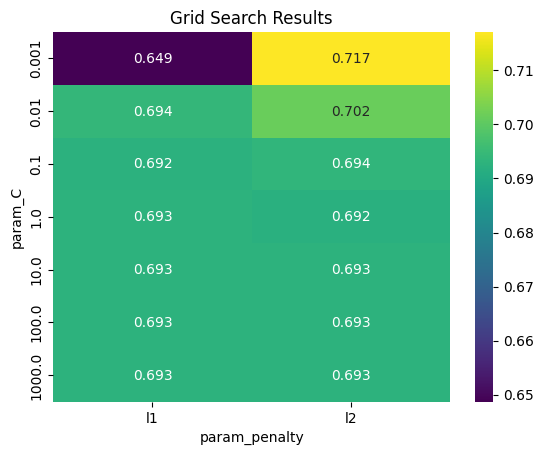

In [67]:
# Step 7: Visualize the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)
results = results.groupby(['param_C', 'param_penalty']).mean().reset_index()
results = results.pivot(index='param_C', columns='param_penalty', values='mean_test_score')

sns.heatmap(results, annot=True, fmt='.3g', cmap='viridis')

# Add a line for the best value of C
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']
best_score = grid_search.best_score_
plt.title("Grid Search Results")
plt.show()




In [68]:
print(results)

param_penalty        l1        l2
param_C                          
0.001          0.648703  0.717121
0.010          0.693878  0.701531
0.100          0.692492  0.693514
1.000          0.692569  0.692125
10.000         0.692601  0.692594
100.000        0.692634  0.692660
1000.000       0.692634  0.692673


## Working on Decision Tree using GridSearchCV to find best hyperparameters

## 1. Decision Tree Hyperparameter Check

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [70]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=8, random_state=42)

## 1. SVM Hyperparameter Check

In [71]:
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [72]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records in training and testing dataset.
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 8799 records.
The testing dataset has 2200 records.


In [73]:
# Initiate scaler
sc = StandardScaler()
# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
# Summary statistics after standardization
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
block,8799.0,-4.078010e-17,1.000057,-1.568422,-0.896764,0.446550,1.118207,1.118207
ship_method,8799.0,1.938064e-17,1.000057,-2.004223,-0.683831,0.636561,0.636561,0.636561
num_calls,8799.0,1.364720e-16,1.000057,-1.799843,-0.925605,-0.051367,0.822870,2.571346
rating,8799.0,2.261075e-17,1.000057,-1.414190,-0.705121,0.003949,0.713018,1.422087
cost,8799.0,-2.713290e-16,1.000057,-2.367773,-0.856448,0.095894,0.841206,2.062688
num_prev_orders,8799.0,-8.317525e-17,1.000057,-1.030992,-0.378680,-0.378680,0.273631,4.187500
priority,8799.0,3.553117e-17,1.000057,-2.134149,-0.548137,-0.548137,1.037874,1.037874
discount,8799.0,5.248923e-17,1.000057,-0.761997,-0.577454,-0.392911,-0.208368,3.174918
weight,8799.0,1.187064e-16,1.000057,-1.604131,-1.094860,0.318015,0.863357,2.580693


In [74]:
# Summary statistics before standardization
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
block,8799.0,2.335152,1.488939,0.0,1.0,3.0,4.0,4.0
ship_method,8799.0,1.517900,0.757394,0.0,1.0,2.0,2.0,2.0
num_calls,8799.0,4.058757,1.143919,2.0,3.0,4.0,5.0,7.0
rating,8799.0,2.994431,1.410380,1.0,2.0,3.0,4.0,5.0
cost,8799.0,210.368110,48.304716,96.0,169.0,215.0,251.0,310.0
num_prev_orders,8799.0,3.580521,1.533097,2.0,3.0,3.0,4.0,10.0
priority,8799.0,1.345607,0.630548,0.0,1.0,1.0,2.0,2.0
discount,8799.0,13.387317,16.257308,1.0,4.0,7.0,10.0,65.0
weight,8799.0,3624.831799,1635.765060,1001.0,1834.0,4145.0,5037.0,7846.0


In [75]:
# Check default values
from sklearn.svm import SVC
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [76]:
# Run model
svc.fit(X_train_transformed, y_train)
# Accuracy score
print(f'The accuracy score of the model is {svc.score(X_test_transformed, y_test):.4f}')

The accuracy score of the model is 0.6750


In [77]:
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')
# List of gamma values
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')

The list of values for C are [ 0.1  1.  10. ]
The list of values for gamma are [ 0.1  1.  10. ]


In [78]:
# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [80]:
# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train_transformed, y_train)
# Print grid search summary
grid_result

KeyboardInterrupt: ignored

# Deep Neural Network

In [81]:
from keras import models
from keras.layers import Dense

In [82]:
X_train.shape

(8799, 9)

In [83]:
y_train.shape

(8799,)

In [84]:
ann = models.Sequential()
ann.add(Dense(14,input_dim=9,activation='relu'))
ann.add(Dense(9,activation='relu'))
ann.add(Dense(9,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer='SGD',metrics=['accuracy'])

In [85]:
ann.summary()
# Deep neural networks represent a network with more number of hidden layers(more than 1-2).

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                140       
                                                                 
 dense_1 (Dense)             (None, 9)                 135       
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 375
Trainable params: 375
Non-trainable params: 0
_________________________________________________________________


In [86]:
ann.fit(X_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
587/587 [==============================] - 2s 2ms/step - loss: 29.5737 - accuracy: 0.5969
Epoch 2/100
587/587 [==============================] - 2s 3ms/step - loss: 0.6744 - accuracy: 0.5976
Epoch 3/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5976
Epoch 4/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5976
Epoch 5/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5976
Epoch 6/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5976
Epoch 7/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5976
Epoch 8/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5976
Epoch 9/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5976
Epoch 10/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accur

In [87]:
predictions = (ann.predict(X_test) > 0.5)
print(classification_report(y_test,predictions))

69/69 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       895
           1       0.59      1.00      0.74      1305

    accuracy                           0.59      2200
   macro avg       0.30      0.50      0.37      2200
weighted avg       0.35      0.59      0.44      2200



# Wide Neural Network

### Wide neural networks represent a network with less number of hidden layers(usually 1-2) but more number of neurons per layer.



In [88]:
model = models.Sequential()
model.add(Dense(14,input_dim=9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer='SGD',metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 14)                140       
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.fit(X_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
587/587 [==============================] - 3s 3ms/step - loss: 489.6957 - accuracy: 0.5975
Epoch 2/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6743 - accuracy: 0.5976
Epoch 3/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5976
Epoch 4/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5976
Epoch 5/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5976
Epoch 6/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5976
Epoch 7/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5976
Epoch 8/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5976
Epoch 9/100
587/587 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5976
Epoch 10/100
587/587 [==============================] - 2s 3ms/step - loss: 0.6740 - accu

In [91]:
prediction = (model.predict(X_test) > 0.5)
print(classification_report(y_test,prediction))

69/69 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       895
           1       0.59      1.00      0.74      1305

    accuracy                           0.59      2200
   macro avg       0.30      0.50      0.37      2200
weighted avg       0.35      0.59      0.44      2200



# Using Hyperparameter

In [92]:
#Get parameter for best result
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

In [93]:
X_train_arr= np.array(X_train)
y_train_arr= np.array(to_categorical(y_train))
X_test_arr= np.array(X_test)
y_test_arr= np.array(to_categorical(y_test))

In [94]:
X_train_arr.shape

(8799, 9)

In [95]:
y_train.shape

(8799,)

In [96]:
X_test_arr.shape

(2200, 9)

In [97]:
from keras.optimizers import Adam
def create_model(activation, learning_rate):
    
    model= Sequential()
    model.add(Dense(100, activation=activation, kernel_initializer='normal', input_shape=(9,)))
    model.add(Dense(50, activation=activation))
    model.add(Dense(25, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    my_opt= Adam(lr=learning_rate)

    model.compile(optimizer=my_opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [98]:
from keras.wrappers.scikit_learn import KerasClassifier

model= KerasClassifier(build_fn= create_model)

In [99]:
from sklearn.model_selection import RandomizedSearchCV

params= {'epochs': [20,30,40,50],
        'batch_size': [220,330,440],
        'activation':['relu', 'tanh'],
        'learning_rate':[0.001, 0.01, 0.1,1]}

random= RandomizedSearchCV(model, param_distributions= params, cv=5)
random.fit(X_train, y_train)

Epoch 1/20
16/16 [==============================] - 1s 6ms/step - loss: 209.4301 - accuracy: 0.5468
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6771 - accuracy: 0.5921
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6763 - accuracy: 0.5921
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6762 - accuracy: 0.5921
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6762 - accuracy: 0.5921
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.5921
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6761 - accuracy: 0.5921
Epoch 8/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6762 - accuracy: 0.5921
Epoch 9/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6762 - accuracy: 0.5921
Epoch 10/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6762 - accuracy: 0.5921
Epoch 11/20
16/16

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff58d79c310>,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'batch_size': [220, 330, 440],
                                        'epochs': [20, 30, 40, 50],
                                        'learning_rate': [0.001, 0.01, 0.1, 1]})

In [100]:
random.best_estimator_

In [101]:
random.best_estimator_.score(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.6614


0.6613636612892151

### Saving our Logistic Regression Model

In [102]:
import pickle

In [103]:
# Save the model to disk
filename = 'lr_model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))

## Saving Artificial Neural Network Model

In [105]:

# Save the model to disk
filename = 'Ann.pkl'
pickle.dump(ann, open(filename, 'wb'))

## Support Vector Machine

In [106]:
# Save the model to disk
filename = 'svm.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

### Random Forest Classifier

In [107]:
# Save the model to disk
filename = 'RandomForestClassifier.pkl'
pickle.dump(RandomForestClassifier, open(filename, 'wb'))

Randomized Search Cv

In [108]:
# Save the model to disk
filename = 'RandomizedSerachCv.pkl'
pickle.dump(RandomizedSearchCV, open(filename, 'wb'))

### Wide Neural Network

In [109]:
# Save the model to disk
filename = 'WNN_model.pkl'
pickle.dump(model, open(filename, 'wb'))